# Project 1 Carlos Palacios

### Part A 

In [83]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 1 Importing DataFrame as df

df = pd.read_csv("p1_communes.csv")

In [3]:
# 2 Number of rows and columns

df.shape

(2202, 17)

In [4]:
# 3 First few entries of "df"

df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


In [5]:
# 4 Index labels and list of column names

df.index.tolist()
df.columns.tolist()

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

In [6]:
# 5 Column data type

df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

In [7]:
# 6 Check for missing values

df.isnull().sum()

Canton                         3
Commune                        0
Language                      11
Residents                      0
Population density per km²     0
0-19 years                     0
20-64 years                    0
65 years or over               0
Private households             0
Surface area in km²            0
Settlement area                0
Agricultural area              0
Wooded area                    0
Unproductive area              0
East coordinate                0
North coordinate               0
Elevation                      0
dtype: int64

In [8]:
df = df.dropna()

## Part B Exploration

In [12]:
# 1 Mean, minimum and maximum for numerical data

numerical_columns = ["Residents", "Population density per km²", "0-19 years", "20-64 years", "65 years or over", 
                     "Private households", "Surface area in km²", "Settlement area", "Agricultural area", "Wooded area", 
                     "Unproductive area", "East coordinate", "North coordinate", "Elevation"]

df[numerical_columns].agg(["mean", "min", "max"])

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
mean,3865.299863,433.424048,20.585167,60.371180,19.043653,1702.485167,17.97283,14.882541,45.929853,32.575829,6.611777,2.631543e+06,1.202302e+06,768.209493
min,11.000000,0.895037,0.000000,18.181818,6.271186,10.000000,0.31000,0.138897,0.000000,0.000000,0.000000,2.486700e+06,1.077200e+06,200.000000
max,415367.000000,12669.052100,37.777778,77.922078,81.818182,201252.000000,438.63000,97.260274,91.509434,88.235294,95.022860,2.828800e+06,1.294100e+06,3080.000000


In [13]:
# 2 Top 10 most populated communes by number of residents

df.nlargest(10, "Residents")[["Commune", "Residents"]]

,Commune,Residents
154,Zürich,415367
2124,Genève,201818
910,Basel,172258
1749,Lausanne,139111
194,Bern,133883
141,Winterthur,111851
535,Luzern,81691
1053,St. Gallen,75833
1582,Lugano,63185
207,Biel/Bienne,55159


In [14]:
# 3  Top 10 least populated communes by number of residents

df.nsmallest(10, "Residents")[["Commune", "Residents"]]

,Commune,Residents
1546,Corippo,11
875,Kammersrohr,28
2011,Bister,33
366,Schelten,36
370,Rebévelier,41
485,Berken,45
1629,Cerentino,45
342,Clavaleyres,46
1160,Lohn (GR),46
1627,Bosco/Gurin,46


In [17]:
# 4 Group communes by canton and save to CSV files

for Canton, data in df.groupby("Canton"):
    data.to_csv(f"{Canton}.csv", index=False)

In [25]:
# 5 Population density at canton level and rank

canton_population_density = df.groupby("Canton").agg({"Residents": "sum",
                                                      "Surface area in km²": "sum"})
canton_population_density["Population Density"] = canton_population_density["Residents"] / canton_population_density["Surface area in km²"]
canton_population_density = canton_population_density.sort_values(by="Population Density", ascending=False)
print(canton_population_density[["Population Density"]])

        Population Density
Canton                    
BS             5271.069012
GE             2031.893255
ZH              948.443099
ZG              612.265881
BL              556.593969
AG              486.145498
SO              345.618319
TG              320.320701
LU              286.577848
VD              283.275259
SH              274.989938
SG              260.210650
NE              249.037193
AR              227.450173
FR              201.503947
SZ              186.964795
NW              179.095881
BE              177.054876
TI              131.670991
AI               93.605056
JU               87.558884
OW               78.733719
VS               65.977584
GL               59.355076
UR               34.457223
GR               29.047582


### Comments:
The top 2 cantons BS and GE have the higest population density, meaning that most of the population leave in this areas. This can be due to the presence of international organizations and the banking sector. UR and GR have notably lower population densities. indicating a sparser population distribution in these areas.

In [26]:
# 6 Communes with more than 50% population aged 20-64

df[df["20-64 years"] > (0.5 * df["Residents"])].groupby("Canton")["Commune"].count()

Canton
BE    11
FR     2
GR     7
JU     2
SO     3
TI     8
VD     4
VS     3
Name: Commune, dtype: int64

In [28]:
# 7 Top 5 cantons with the largest range of elevations

canton_elevation_range = df.groupby("Canton")["Elevation"].apply(lambda x: x.max() - x.min())
canton_elevation_range.nlargest(5)

Canton
VS    2610
TI    2044
BE    2025
GR    2017
UR    1871
Name: Elevation, dtype: int64

## Part C Visualizations

Text(0, 0.5, 'Commune')

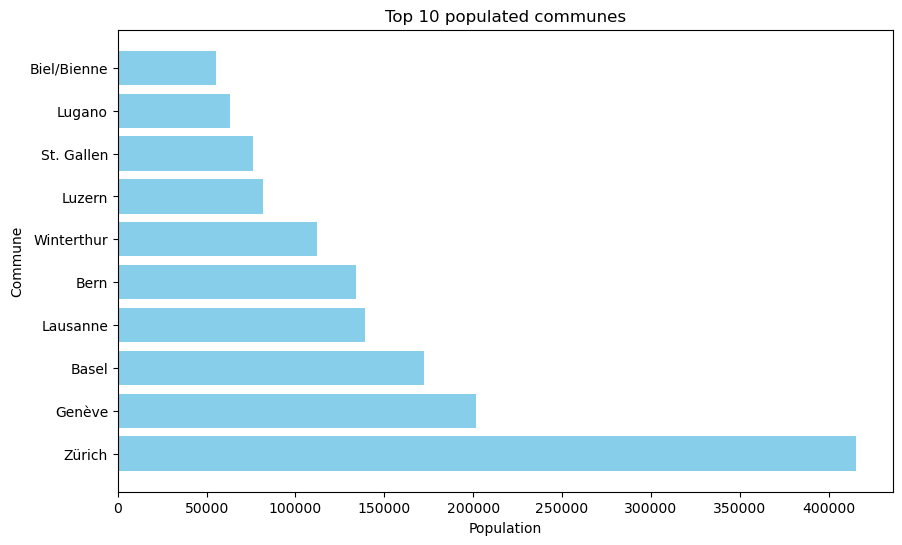

In [46]:
# 1 Top 10 population communes - Horizontal Bar Plot

top_10_populated_communes = df.nlargest(10, "Residents")[["Commune", "Residents"]]

plt.figure(figsize=(10, 6))
plt.barh(top_10_populated_communes["Commune"], top_10_populated_communes["Residents"], color="skyblue")
plt.title("Top 10 populated communes")
plt.xlabel("Population")
plt.ylabel("Commune")

<Figure size 800x400 with 0 Axes>

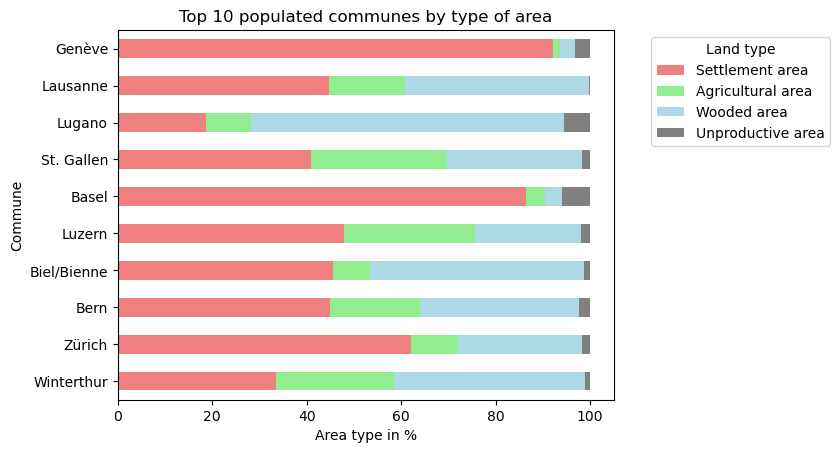

In [70]:
# 2 Horizontal stacked bar chart for land division

plt.figure(figsize=(8, 4))
land_division_columns = ["Settlement area", "Agricultural area", "Wooded area", "Unproductive area"]
colors = ["lightcoral", "lightgreen", "lightblue", "grey"]


top_10_communes_data = df[df["Commune"].isin(top_10_populated_communes["Commune"])]

top_10_communes_data.plot.barh(x="Commune", y=land_division_columns, stacked=True, color=colors)
plt.title("Top 10 populated communes by type of area")
plt.xlabel("Area type in %")
plt.ylabel("Commune")
plt.legend(title="Land type", loc = "upper right", bbox_to_anchor=(1.45, 1))


### Comments:

Geneva's and Basel's land types are dominated by residential areas, which means that most buildings are residential, and the largest agricultural sector in the most populous communes is located in St. Gallen, Lucerne and Winterthur. Finally, the unproductive area is low compared to other areas, which could indicate that the cantons are trying to maximize the use of their land. 

Text(0, 0.5, 'Number of communes')

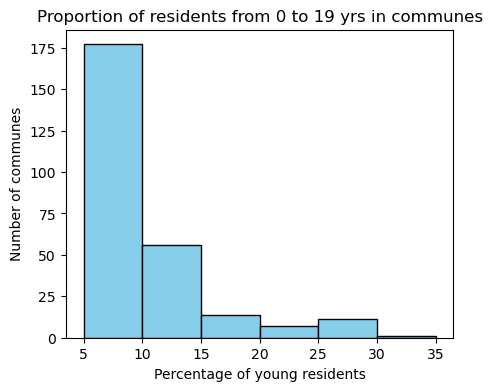

In [80]:
# 3 Histogram for proportions of young residents

plt.figure(figsize=(5, 4))
plt.hist(df["0-19 years"] / df["Residents"] * 100, bins=[5, 10, 15, 20, 25, 30, 35], edgecolor="black", color="skyblue")
plt.title("Proportion of residents from 0 to 19 yrs in communes")
plt.xlabel("Percentage of young residents")
plt.ylabel("Number of communes")

Text(0, 0.5, 'Percentage of young residents')

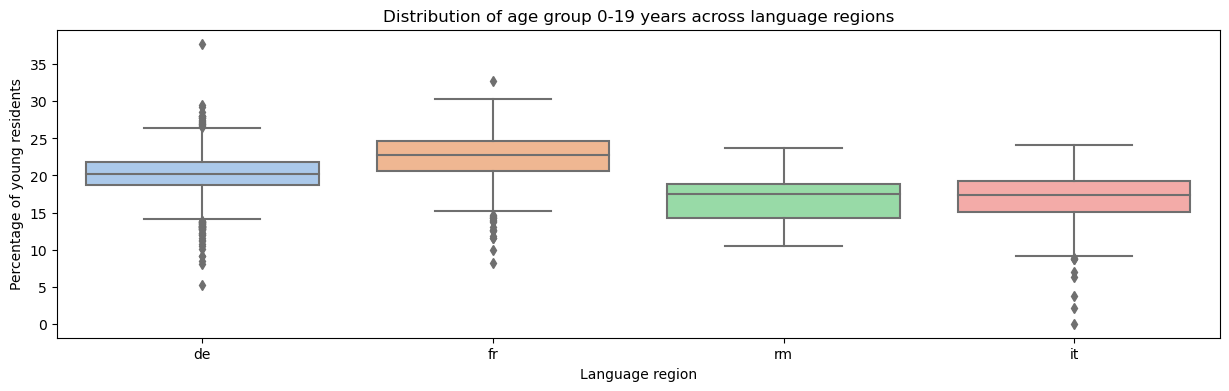

In [91]:
# 4 Distribution of age group 0-19 yrs across Language regions (Violin Plot)

plt.figure(figsize=(15, 4))
sns.boxplot(x="Language", y="0-19 years", data=df, palette="pastel")
plt.title("Distribution of age group 0-19 years across language regions")
plt.xlabel("Language region")
plt.ylabel("Percentage of young residents")

### Comments:
It appears to be that around 20% of the young residents between 0-19 years speake or are in contact with the 4 main languages German, Romansh, Italian, and French in Switzerland.

Text(0, 0.5, 'Percentage of population')

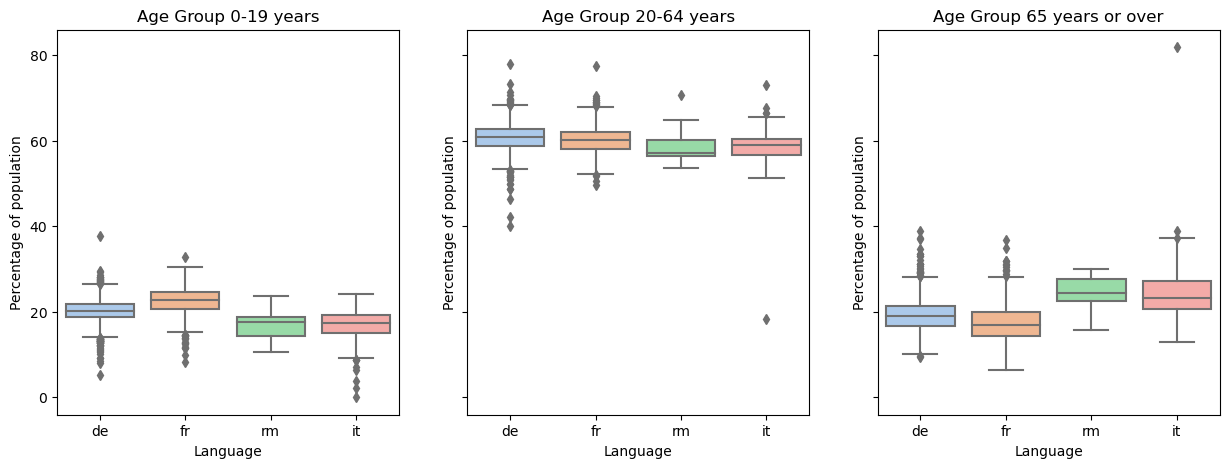

In [95]:
# 5 Distribution of the three age groups across language regions

# Creation of subplots for age groups 0-19, 20-64, and 65 or over
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for Age Group 0-19
sns.boxplot(x="Language", y="0-19 years", data=df, ax=axes[0], palette="pastel")
axes[0].set_title("Age Group 0-19 years")
axes[0].set_ylabel("Percentage of population")

# Plot for Age Group 20-24
sns.boxplot(x="Language", y="20-64 years", data=df, ax=axes[1], palette="pastel")
axes[1].set_title("Age Group 20-64 years")
axes[1].set_ylabel("Percentage of population")

# Plot for Age Group 0-19
sns.boxplot(x="Language", y="65 years or over", data=df, ax=axes[2], palette="pastel")
axes[2].set_title("Age Group 65 years or over")
axes[2].set_ylabel("Percentage of population")


C:\Users\palac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pairplot of Agricultural, Settlement, Wooded, and Unproductive area')

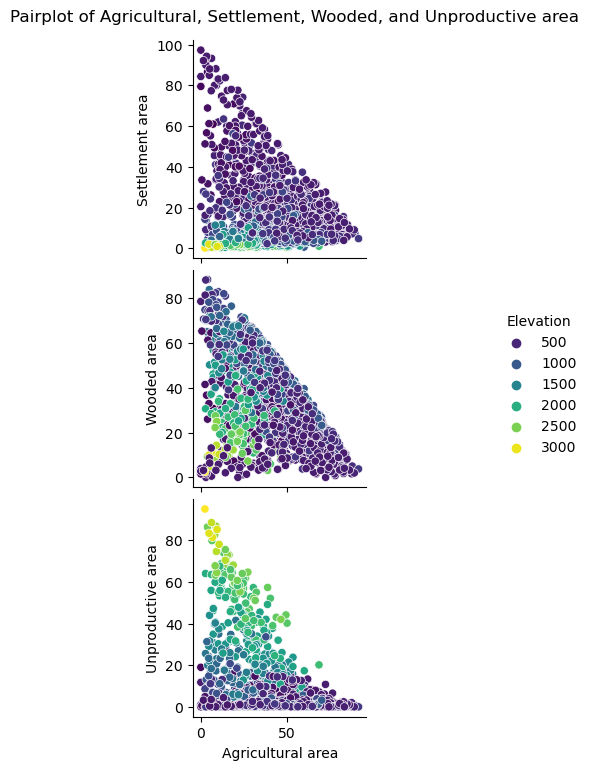

In [104]:
# 6 Pairplot for Agricultural, Settlement, Wooded, and Unproductive Areas

pairplot_vars = ["Agricultural area", "Settlement area", "Wooded area", "Unproductive area"]
pairplot_data = df[pairplot_vars + ["Elevation"]]

sns.pairplot(pairplot_data, hue="Elevation", palette="viridis",y_vars=["Settlement area", "Wooded area", "Unproductive area"], x_vars=["Agricultural area"])
plt.suptitle("Pairplot of Agricultural, Settlement, Wooded, and Unproductive area", y=1.02)

### There is a linear relation

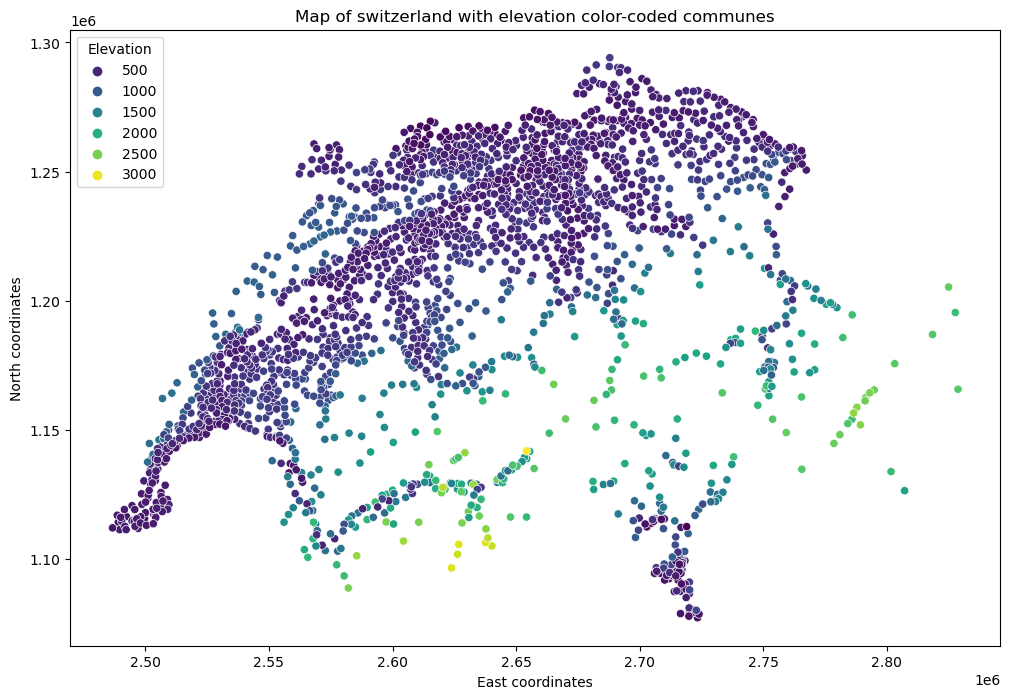

In [111]:
# 7 Scatter plot with elevation as color-code variable

plt.figure(figsize=(12, 8))
sns.scatterplot(x="East coordinate", y="North coordinate", hue="Elevation", palette="viridis", data=df)
plt.title("Map of switzerland with elevation color-coded communes")
plt.xlabel("East coordinates")
plt.ylabel("North coordinates")
plt.legend(title="Elevation", loc="upper left")

### Comments:
The highest parts of Switzerland appear to be located in the south-east, which may explain why there are fewer and more scattered communes in this region.

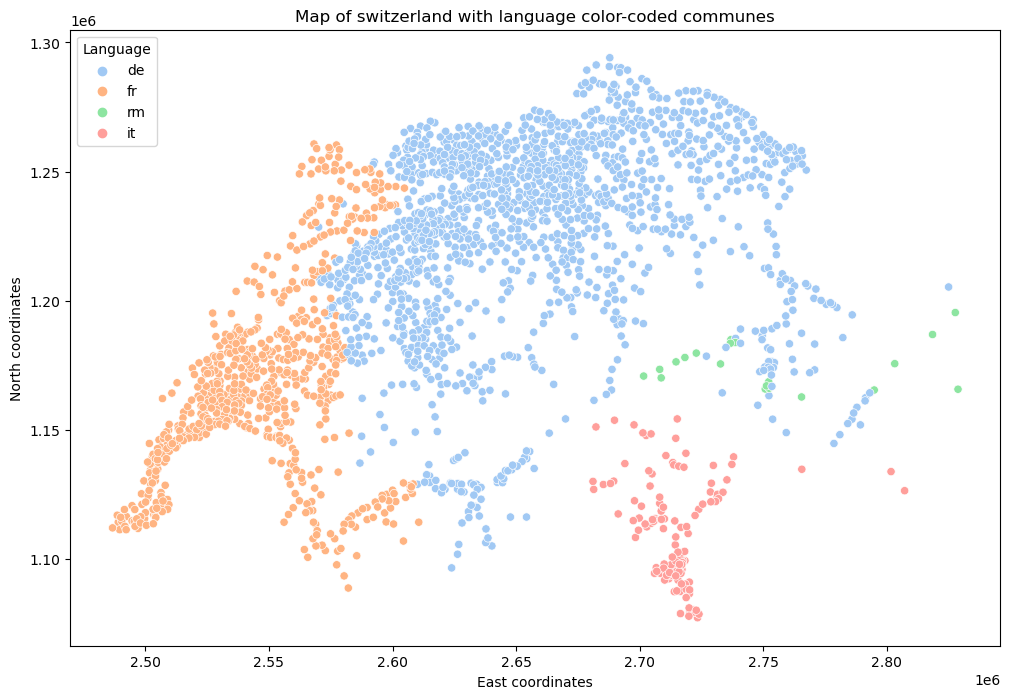

In [113]:
# Map of Switzerland with language color-coded communes

plt.figure(figsize=(12, 8))
sns.scatterplot(x="East coordinate", y="North coordinate", hue="Language", palette="pastel", data=df)
plt.title("Map of switzerland with language color-coded communes")
plt.xlabel("East coordinates")
plt.ylabel("North coordinates")
plt.legend(title="Language", loc="upper left")

### Comments:
German-speaking communes are the most numerous, followed by French- and Italian-speaking communes, and are clearly sectorized by their proximity to Germany, France and Italy. There are very few Romansh-speaking communes, and most of them are located at high altitudes.

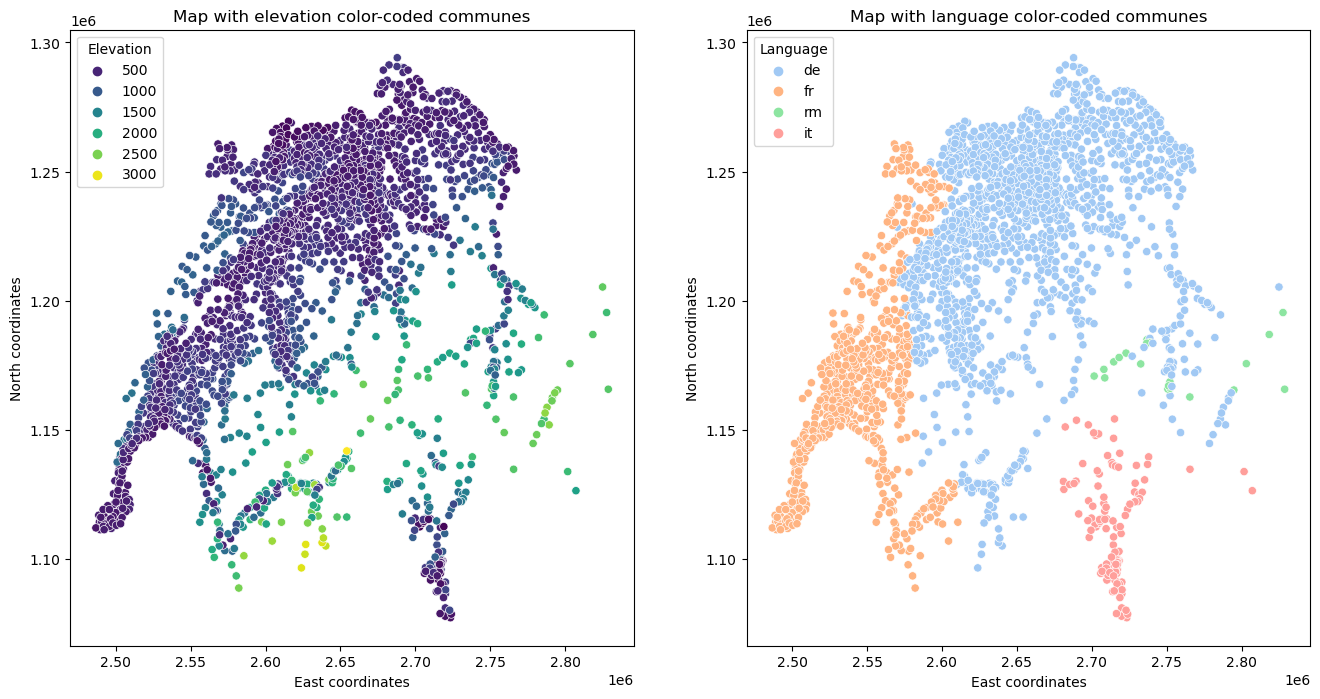

In [116]:
# 8 Subplot with the two previous graphs

# Creating the subplots
fig, axes= plt.subplots(1, 2, figsize=(16, 8))

# Plot with elevation as color-code variable
sns.scatterplot(x="East coordinate", y="North coordinate", hue="Elevation", palette="viridis", data=df, ax=axes[0])
axes[0].set_title("Map with elevation color-coded communes")
axes[0].set_xlabel("East coordinates")
axes[0].set_ylabel("North coordinates")
axes[0].legend(title="Elevation", loc="upper left")

#Plot with language as color-code variable
sns.scatterplot(x="East coordinate", y="North coordinate", hue="Language", palette="pastel", data=df, ax=axes[1])
axes[1].set_title("Map with language color-coded communes")
axes[1].set_xlabel("East coordinates")
axes[1].set_ylabel("North coordinates")
axes[1].legend(title="Language", loc="upper left")

## Part D Probabilities

In [139]:
# Total number of communes with elevateion > 2000
total_elevation_over_2000 = len(df[df["Elevation"] > 2000])

#Number of communes with elevation > 2000 in Valais
valais_elevation_over2000 = len(df[(df["Elevation"] > 2000) & (df["Canton"] == "Valais")])

# Conditional probability calculation
probability_valais_given_elevation_over_2000 = valais_elevation_over2000 /total_elevation_over_2000

print(f"The probability that a randomly selected commune with elevation over 2000 is from the canton of Valais: {probability_valais_given_elevation_over_2000:.2f}")


The probability that a randomly selected commune with elevation over 2000 is from the canton of Valais: 0.00


### Comments:

I tried to make a direct approach but the result was 0, so i will calculate the total communes in valais that have elevation > 1900, to confirm the calculation

In [144]:
# Communes in Valais with elevation > 1900

valias_communes_elevation_over_1900 = df[(df["Canton"] == "Valais") & (data["Elevation"] > 1900)]
valias_communes_elevation_over_1900

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation


### Comments:
As per the results above, there is no commune in Valais with elevation over 1900, hence the probability is 0

## Part E Matrices

In [146]:
# To avoid the modification of hte data i will create a copy

df_copy = df.copy()

# Creating a columns if "In Canton"
df_copy["In Canton"] = 1

# Creating binary matrix
binary_matrix = pd.pivot_table(df_copy, values="In Canton", index=df_copy.index, columns="Canton", fill_value=0)

print(binary_matrix)

Canton  AG  AI  AR  BE  BL  BS  FR  GE  GL  GR  ...  SH  SO  SZ  TG  TI  UR  \
0        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
2197     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2198     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2199     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2200     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2201     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

Canton  VD  VS  ZG  ZH  
0        0   0   0   1  
1

In [147]:
df_copy.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation,In Canton
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673,1
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502,1
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583,1
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653,1
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543,1
